# Granovetter - Threshold Models of Collective Behavior

[Paper on JSTOR](http://www.jstor.org/stable/2778111)

In [3]:
%pylab inline
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


In [61]:
class ThresholdModel(object):
    def __init__(self, g, thresholds):
        self.g = g
        threshold_dict = dict(zip(g.nodes(), thresholds))
        g.node[g.nodes()[0]]['threshold'] = 0
        nx.set_node_attributes(self.g, 'threshold', threshold_dict)
        nx.set_node_attributes(self.g, 'rioting', False)
        
    def draw(self):
        key = {False:'b', True:'r'}
        colors = [key[self.g.node[n]['rioting']] for n in self.g.nodes() ]
        nx.draw_circular(self.g, alpha=.6, node_color=colors)
        
    def step(self):
        def decide(g, n):
            neighbors = g.neighbors(n)
            threshold = g.node[n]['threshold']
            rioting = sum([g.node[neighbor]['rioting'] for neighbor in neighbors])
            return rioting >= (threshold*len(neighbors))

        new_state = dict(zip(self.g.nodes(),[decide(self.g,n) for n in self.g.nodes()]))
        nx.set_node_attributes(self.g, 'rioting', new_state)
        
    def num_rioting(self):
        return sum([self.g.node[n]['rioting'] for n in self.g.nodes()])
        

In [68]:
num_nodes = 25
g2 = nx.complete_graph(num_nodes)
thresholds = np.random.uniform(0, 1, size=num_nodes)
thresholds[0] = 0

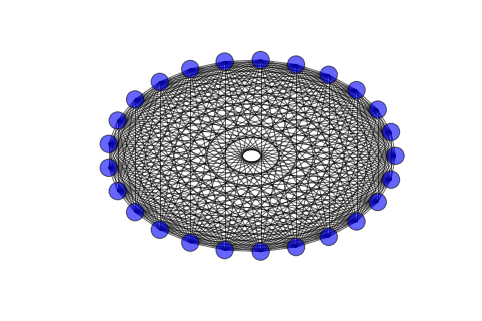

In [69]:
model = ThresholdModel(g2, thresholds)
model.draw()

25

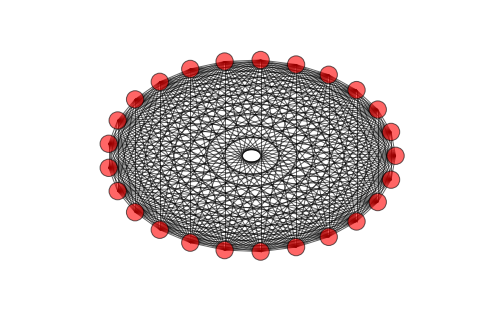

In [90]:
model.step()
model.draw()
model.num_rioting()